# Gradient boosting
In dit notebook gaan wij kijken naar het model `Gradient boosting` en hoe dit model ons kan helpen bij de voorspellingen op onze dataset.

# Libraries importeren

In [33]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import matplotlib.pyplot as plt


# Data importeren
De data die gebruikt wordt is de data die gegenereerd is in het notebook `2 - sample analysing` (de dataset zonder 100% NaN waardes).

In [18]:
df = pd.read_csv('../data/sample_without_100nan.csv')

# Gradient boosting

`Gradient boosting` zijn een aantal ensemble machine learning algoritmes die gebruikt kunnen worden voor classificatie of regressie problemen.

De ensembles zijn gemaakt van `decision tree modellen`. De trees worden stuk voor stuk toegevoegd aan de ensemble, en worden vervolgens gefit om zo de prediction errors, gemaakt door vorige modellen, op te lossen. Dit model wordt `boosting` genoemd.

Modellen zijn gefit met een `loss-functie` en `gradient descent optimization` algoritme. Dit geeft de techniek de naam `gradient boosting`, omdat de `loss gradient` geminimaliseerd wordt.

### Extreme Gradient Boosting (XGBoost)
XGBoost is een open-sourced implementatie van het `gradient boosting` algoritme. 

XGBoost is een populaire library doordat het XGBoost algoritme snel is, en tevens ook een goede model performance heeft.

## XGBoost Regression

Wij gebruiken een XGBoost regressie model met de default hyperparameters op de dataset.

### Label encoding

Ten eerste encoden wij de features `date`, `serial_number` en `model`. Deze features zijn van het type `object`, en dit moeten numerieke waardes worden.

Om dit te realiseren, gebruiken we de `preprocessing` module van `Scikit-Learn`, om de string waardes om te zetten in getallen.

In [19]:
label_encoder = preprocessing.LabelEncoder()

df['date'] = label_encoder.fit_transform(df['date'])
df['serial_number'] = label_encoder.fit_transform(df['serial_number'])
df['model'] = label_encoder.fit_transform(df['model'])

De `head()` functie toont nu de dataset met bovenstaande strings omgezet naar categorische integers.

In [20]:
df.head()

,date,serial_number,model,failure,smart_5_raw,smart_9_raw,smart_187_raw,smart_188_raw,smart_194_raw,smart_197_raw,smart_198_raw
0,0,14603,11,0,0.0,35462.0,0.0,0.0,22.0,0.0,0.0
1,0,86572,1,0,0.0,12494.0,0.0,0.0,28.0,0.0,0.0
2,0,86571,1,0,0.0,9544.0,0.0,0.0,29.0,0.0,0.0
3,0,86570,1,0,0.0,13098.0,0.0,0.0,25.0,0.0,0.0
4,0,35481,21,0,0.0,23427.0,0.0,0.0,32.0,0.0,0.0


In [21]:
X = df.drop(['failure'], axis=1).values
y = df['failure'].values

X.shape, y.shape

((22008389, 10), (22008389,))

In [22]:
df_dmatrix = xgb.DMatrix(data=X,label=y)

### Opsplitsen trainings- en validatieset

Wij voorspellen de `failure`.

Eerst maken we een kopie aan van de originele data. Deze data wordt vervolgens opgedeeld in matrices, waarbij `failure` als Y wordt gekozen.

In [26]:
reg_X = df.drop(['failure'], axis=1).values
reg_Y = df['failure'].values

reg_X.shape, reg_Y.shape

((22008389, 10), (22008389,))

Voor het opsplitsen van de data in een trainingsset en in een validatieset gebruiken we `Scikit-learn`. Een model wordt gebruikt om te trainen, en de andere wordt gebruikt om te testen.

De data wordt opgesplit in een 80/20 split.

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### Model 

https://www.datacamp.com/community/tutorials/xgboost-in-python

In [36]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=10)

In [37]:
xg_reg.fit(X_train, Y_train)

preds = xg_reg.predict(X_test)

In [38]:
rmse = np.sqrt(mean_squared_error(Y_test, preds))

print("RMSE: %f" % (rmse))

RMSE: 0.174416


In [39]:
params = {"objective":"reg:squarederror", 'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=df_dmatrix, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)

In [30]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.450621,0.000000e+00,0.450545,0.000000e+00
1,0.403809,4.714045e-07,0.405053,4.714045e-07
2,0.364447,4.714045e-07,0.364448,8.164966e-07
3,0.329767,8.164966e-07,0.328795,1.247219e-06
4,0.294254,9.428090e-07,0.295331,1.885618e-06


In [31]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.00624
Name: test-rmse-mean, dtype: float64


In [32]:
xg_regr = xgb.train(params=params, dtrain=df_dmatrix, num_boost_round=10)

[21:42:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

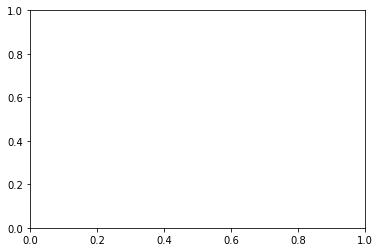

In [35]:
xgb.plot_tree(xg_regr, num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()